In [2]:
pip install yfinance --user


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

google = yf.Ticker("GOOG")

In [4]:
df = google.history(period='1d', interval="1m")
print(df.head())

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-04-25 09:30:00-04:00  153.289993  154.800003  153.029999  154.720093   
2024-04-25 09:31:00-04:00  154.720001  154.877502  153.389999  153.419998   
2024-04-25 09:32:00-04:00  153.440002  153.550003  152.929993  153.389999   
2024-04-25 09:33:00-04:00  153.425003  153.804993  152.768005  153.039993   
2024-04-25 09:34:00-04:00  153.017700  153.610001  152.960007  153.505005   

                            Volume  Dividends  Stock Splits  
Datetime                                                     
2024-04-25 09:30:00-04:00  1780631        0.0           0.0  
2024-04-25 09:31:00-04:00   294793        0.0           0.0  
2024-04-25 09:32:00-04:00   560118        0.0           0.0  
2024-04-25 09:33:00-04:00   296325        0.0           0.0  
2024-04-25 09:34:00-04:00   240130        0.0           0.0  


In [5]:
df = google.history(period='1d', interval="1m")
df = df[['Low']]
df.head()

,Low
Datetime,
2024-04-25 09:30:00-04:00,153.029999
2024-04-25 09:31:00-04:00,153.389999
2024-04-25 09:32:00-04:00,152.929993
2024-04-25 09:33:00-04:00,152.768005
2024-04-25 09:34:00-04:00,152.960007


In [6]:
df['date'] = pd.to_datetime(df.index).time
df.set_index('date', inplace=True)
df.head()

,Low
date,
09:30:00,153.029999
09:31:00,153.389999
09:32:00,152.929993
09:33:00,152.768005
09:34:00,152.960007


In [7]:
X = df.index.values
y = df['Low'].values
# The split point is the 10% of the dataframe length
offset = int(0.10*len(df))
X_train = X[:-offset]
y_train = y[:-offset]
X_test = X[-offset:]
y_test = y[-offset:]

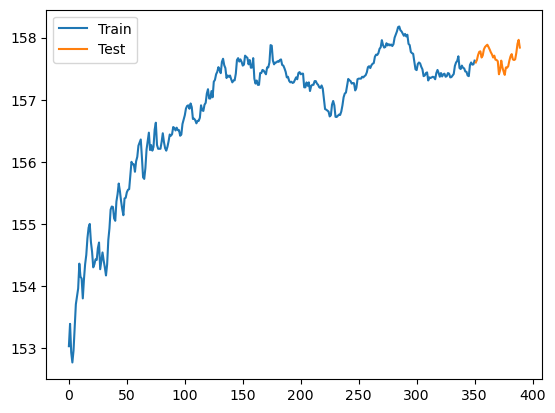

In [8]:
plt.plot(range(0,len(y_train)),y_train, label='Train')
plt.plot(range(len(y_train),len(y)),y_test,label='Test')
plt.legend()
plt.show()

In [19]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris  # Corrected import for loading data

# Load your data (Replace load_iris() with appropriate function for your dataset)
X, y = load_iris(return_X_y=True)  # Using load_iris() as an example

# Create a logistic regression model
model = LogisticRegression()

# Fit the model
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    try:
        model.fit(X, y)
    except ConvergenceWarning as e:
        print("ConvergenceWarning: Maximum number of iterations exceeded")
        print(e)  # Print the actual warning message if needed

# Evaluate the model
score = model.score(X, y)
print("Model score:", score)
print("TAC021130 Jayesh Tapkir")



Model score: 0.9733333333333334
TAC021130 Jayesh Tapkir


In [20]:
print("TAC021130 Jayesh Tapkir")
y_train = [0, 1, 0, 1, 1]
y_test = [0, 1, 0, 0, 1]
forecast = [0, 1, 0, 1, 1]


if len(y_train) > 0:
    print(f'Real data for time 0: {y_train[-1]}')  
else:
    print("Error: y_train is empty")

if len(y_test) > 0:
    print(f'Real data for time 1: {y_test[0]}')  
else:
    print("Error: y_test is empty")

if len(forecast) > 0:
    print(f'Pred data for time 1: {forecast[0]}')  
else:
    print("Error: forecast is empty")



TAC021130 Jayesh Tapkir
Real data for time 0: 1
Real data for time 1: 0
Pred data for time 1: 0
